<h1><center>Analysis of new media on stock returns</center><h1>

## Project Team – Group 13
- Vidur  Puliani          A0198492L
- Lei Xiaowen             A0198449H
- Donal Ngo Jin Ze        A0198487A
- Wilson Lum Kok Keong    A0198478A
<br><br>

# Word Cloud & Topic Modelling Analysis

1. Read in both Stocktwits datasets
2. Preprocess with stopwords
3. Wordcloud Analysis
4. Create Vectorizer & WordCloud for Unigram, Bigram and Trigram
5. Create LDA Model
6. pyLDAvis Display
7. Save Model and output of Topics

## Import Library

In [1]:
from wordcloud import WordCloud
import pandas as pd
import re

import nltk
from nltk import word_tokenize, FreqDist
from nltk.corpus import stopwords

from sklearn.feature_extraction.text import CountVectorizer
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.simplefilter("ignore", DeprecationWarning)
# Load the LDA model from sk-learn
from sklearn.decomposition import LatentDirichletAllocation as LDA
 
sns.set_style('whitegrid')
%matplotlib inline
import matplotlib.colors as mcolors

### Define Variables

In [2]:
# Tweak the two parameters below
number_topics = 3
number_words = 30

## 1. Reading in the Stocktwits dataset

In [3]:
#Read the excel file from worksheet
xls = pd.ExcelFile('data scrapping/data/stocktwits_Mar-08-2020.xlsx')
stocks = pd.read_excel(xls, 'stocks_label')

In [4]:
stocks

ticker            created_at  \
0       YHOO  2020-01-17T11:27:20Z   
1       YHOO  2020-01-10T20:35:12Z   
2       YHOO  2019-11-22T18:51:04Z   
3       YHOO  2019-11-15T03:11:21Z   
4       YHOO  2019-11-11T05:29:41Z   
5       YHOO  2019-11-09T16:04:18Z   
6       YHOO  2019-11-03T22:32:24Z   
7       YHOO  2019-11-01T03:00:53Z   
8       YHOO  2019-10-03T21:48:55Z   
9       YHOO  2019-10-03T20:18:14Z   
10      YHOO  2019-10-02T21:20:48Z   
11      YHOO  2019-09-29T06:25:32Z   
12      YHOO  2019-09-26T16:35:35Z   
13      YHOO  2019-09-23T23:28:51Z   
14      YHOO  2019-08-28T14:08:05Z   
15      YHOO  2019-08-15T23:09:21Z   
16      YHOO  2019-08-14T17:48:50Z   
17      YHOO  2019-07-29T00:38:22Z   
18      YHOO  2019-05-29T01:09:23Z   
19      YHOO  2019-03-15T01:34:44Z   
20      YHOO  2019-03-06T23:41:47Z   
21      YHOO  2019-03-05T16:10:15Z   
22      YHOO  2019-02-27T18:53:30Z   
23      YHOO  2019-02-23T14:36:14Z   
24      YHOO  2019-02-22T21:34:17Z   
25      YHOO  2019-02-20T16:55:58Z   
26      YHOO  2019-02-20T16:54:25Z   
27      YHOO  2019-02-16T15:57:44Z   
28      YHOO  2019-02-14T17:24:47Z   
29      YHOO  2019-02-08T08:49:07Z   
...      ...                   ...   
46082   MSFT  2019-11-18T02:47:40Z   
46083   MSFT  2019-11-18T02:44:47Z   
46084   MSFT  2019-11-18T01:49:49Z   
46085   MSFT  2019-11-17T23:01:13Z   
46086   MSFT  2019-11-17T21:06:15Z   
46087   MSFT  2019-11-17T21:04:42Z   
46088   MSFT  2019-11-17T20:33:06Z   
46089   MSFT  2019-11-17T18:40:30Z   
46090   MSFT  2019-11-17T18:39:35Z   
46091   MSFT  2019-11-17T16:57:05Z   
46092   MSFT  2019-11-17T07:40:26Z   
46093   MSFT  2019-11-17T06:16:54Z   
46094   MSFT  2019-11-17T03:08:46Z   
46095   MSFT  2019-11-16T20:49:03Z   
46096   MSFT  2019-11-16T20:45:01Z   
46097   MSFT  2019-11-16T19:17:54Z   
46098   MSFT  2019-11-16T15:01:55Z   
46099   MSFT  2019-11-16T11:40:48Z   
46100   MSFT  2019-11-16T11:35:46Z   
46101   MSFT  2019-11-16T05:47:36Z   
46102   MSFT  2019-11-16T04:52:58Z   
46103   MSFT  2019-11-16T03:05:05Z   
46104   MSFT  2019-11-16T01:52:38Z   
46105   MSFT  2019-11-16T01:49:41Z   
46106   MSFT  2019-11-16T01:23:12Z   
46107   MSFT  2019-11-16T01:13:18Z   
46108   MSFT  2019-11-16T00:30:31Z   
46109   MSFT  2019-11-15T23:43:08Z   
46110   MSFT  2019-11-15T23:01:15Z   
46111   MSFT  2019-11-15T22:35:49Z   

                                                   links  \
0      [{'title': 'Yahoo partnership puts Binance bac...   
1                                                    NaN   
2                                                    NaN   
3                                                    NaN   
4                                                    NaN   
5                                                    NaN   
6                                                    NaN   
7                                                    NaN   
8                                                    NaN   
9      [{'title': 'Tickeron', 'url': 'https://tickero...   
10     [{'title': 'Tickeron', 'url': 'https://tickero...   
11     [{'title': 'Tickeron', 'url': 'https://tickero...   
12     [{'title': 'Tickeron', 'url': 'https://tickero...   
13                                                   NaN   
14                                                   NaN   
15                                                   NaN   
16                                                   NaN   
17                                                   NaN   
18                                                   NaN   
19                                                   NaN   
20                                                   NaN   
21                                                   NaN   
22                                                   NaN   
23                                                   NaN   
24                                                   NaN   
25                                                   NaN   
26                           

In [5]:
len(stocks)

46112

## 2. Preprocess stopwords

In [6]:
stopword    = stopwords.words("English")
mystopwords = ['buy buy buy','cnbc','pump','happy new year','day moving average', '____','...','___','_','__','000','00','buy','pump','yes',
               'days future price','change investing section','days future recommended','growthstocks','section','lol','per','gon','na','hour',
               'pct','ads','looks','like','year','ta','wk','growthstocks','supply demand','demand strength','feb','youtube','channelcheck','free',
               'justrading youtube','video','justrading','bell','click','thanks','subscribe','rangecharts','weekly','new ath','good','luck',
               'tomorrow','daily','jnj','sell','wmt','supply','demand','strength','chart','likesubscribeand','comp','week','jan','today',
               'remember','ath','going']

stopword.extend(mystopwords)

In [7]:
def topic_pre_process(text):
    # Remove all the special characters
    processed_text = re.sub(r'\W', ' ', str(text))
    # Substituting multiple spaces with single space
    processed_text= re.sub(r'\s+', ' ', processed_text, flags=re.I)
    # Substituting rows with only numbers with null
    processed_text = re.sub(r'[0-9]+', '', processed_text)
    processed_text = re.sub(r"\d", "", processed_text)
    processed_text = processed_text.lower()

    tokens = nltk.word_tokenize(processed_text)
    tokens=[ t for t in tokens if t not in stopword]
    text_after_process =" ".join(tokens)
    return(text_after_process)


In [8]:
stocks['text'] = stocks.body.apply(topic_pre_process)

In [9]:
stocks

ticker            created_at  \
0       YHOO  2020-01-17T11:27:20Z   
1       YHOO  2020-01-10T20:35:12Z   
2       YHOO  2019-11-22T18:51:04Z   
3       YHOO  2019-11-15T03:11:21Z   
4       YHOO  2019-11-11T05:29:41Z   
5       YHOO  2019-11-09T16:04:18Z   
6       YHOO  2019-11-03T22:32:24Z   
7       YHOO  2019-11-01T03:00:53Z   
8       YHOO  2019-10-03T21:48:55Z   
9       YHOO  2019-10-03T20:18:14Z   
10      YHOO  2019-10-02T21:20:48Z   
11      YHOO  2019-09-29T06:25:32Z   
12      YHOO  2019-09-26T16:35:35Z   
13      YHOO  2019-09-23T23:28:51Z   
14      YHOO  2019-08-28T14:08:05Z   
15      YHOO  2019-08-15T23:09:21Z   
16      YHOO  2019-08-14T17:48:50Z   
17      YHOO  2019-07-29T00:38:22Z   
18      YHOO  2019-05-29T01:09:23Z   
19      YHOO  2019-03-15T01:34:44Z   
20      YHOO  2019-03-06T23:41:47Z   
21      YHOO  2019-03-05T16:10:15Z   
22      YHOO  2019-02-27T18:53:30Z   
23      YHOO  2019-02-23T14:36:14Z   
24      YHOO  2019-02-22T21:34:17Z   
25      YHOO  2019-02-20T16:55:58Z   
26      YHOO  2019-02-20T16:54:25Z   
27      YHOO  2019-02-16T15:57:44Z   
28      YHOO  2019-02-14T17:24:47Z   
29      YHOO  2019-02-08T08:49:07Z   
...      ...                   ...   
46082   MSFT  2019-11-18T02:47:40Z   
46083   MSFT  2019-11-18T02:44:47Z   
46084   MSFT  2019-11-18T01:49:49Z   
46085   MSFT  2019-11-17T23:01:13Z   
46086   MSFT  2019-11-17T21:06:15Z   
46087   MSFT  2019-11-17T21:04:42Z   
46088   MSFT  2019-11-17T20:33:06Z   
46089   MSFT  2019-11-17T18:40:30Z   
46090   MSFT  2019-11-17T18:39:35Z   
46091   MSFT  2019-11-17T16:57:05Z   
46092   MSFT  2019-11-17T07:40:26Z   
46093   MSFT  2019-11-17T06:16:54Z   
46094   MSFT  2019-11-17T03:08:46Z   
46095   MSFT  2019-11-16T20:49:03Z   
46096   MSFT  2019-11-16T20:45:01Z   
46097   MSFT  2019-11-16T19:17:54Z   
46098   MSFT  2019-11-16T15:01:55Z   
46099   MSFT  2019-11-16T11:40:48Z   
46100   MSFT  2019-11-16T11:35:46Z   
46101   MSFT  2019-11-16T05:47:36Z   
46102   MSFT  2019-11-16T04:52:58Z   
46103   MSFT  2019-11-16T03:05:05Z   
46104   MSFT  2019-11-16T01:52:38Z   
46105   MSFT  2019-11-16T01:49:41Z   
46106   MSFT  2019-11-16T01:23:12Z   
46107   MSFT  2019-11-16T01:13:18Z   
46108   MSFT  2019-11-16T00:30:31Z   
46109   MSFT  2019-11-15T23:43:08Z   
46110   MSFT  2019-11-15T23:01:15Z   
46111   MSFT  2019-11-15T22:35:49Z   

                                                   links  \
0      [{'title': 'Yahoo partnership puts Binance bac...   
1                                                    NaN   
2                                                    NaN   
3                                                    NaN   
4                                                    NaN   
5                                                    NaN   
6                                                    NaN   
7                                                    NaN   
8                                                    NaN   
9      [{'title': 'Tickeron', 'url': 'https://tickero...   
10     [{'title': 'Tickeron', 'url': 'https://tickero...   
11     [{'title': 'Tickeron', 'url': 'https://tickero...   
12     [{'title': 'Tickeron', 'url': 'https://tickero...   
13                                                   NaN   
14                                                   NaN   
15                                                   NaN   
16                                                   NaN   
17                                                   NaN   
18                                                   NaN   
19                                                   NaN   
20                                                   NaN   
21                                                   NaN   
22                                                   NaN   
23                                                   NaN   
24                                                   NaN   
25                                                   NaN   
26                           

In [10]:
stocks['date'] = pd.to_datetime(stocks['created_at'],format="%Y/%m/%d",utc=False)

In [11]:
stocks

ticker            created_at  \
0       YHOO  2020-01-17T11:27:20Z   
1       YHOO  2020-01-10T20:35:12Z   
2       YHOO  2019-11-22T18:51:04Z   
3       YHOO  2019-11-15T03:11:21Z   
4       YHOO  2019-11-11T05:29:41Z   
5       YHOO  2019-11-09T16:04:18Z   
6       YHOO  2019-11-03T22:32:24Z   
7       YHOO  2019-11-01T03:00:53Z   
8       YHOO  2019-10-03T21:48:55Z   
9       YHOO  2019-10-03T20:18:14Z   
10      YHOO  2019-10-02T21:20:48Z   
11      YHOO  2019-09-29T06:25:32Z   
12      YHOO  2019-09-26T16:35:35Z   
13      YHOO  2019-09-23T23:28:51Z   
14      YHOO  2019-08-28T14:08:05Z   
15      YHOO  2019-08-15T23:09:21Z   
16      YHOO  2019-08-14T17:48:50Z   
17      YHOO  2019-07-29T00:38:22Z   
18      YHOO  2019-05-29T01:09:23Z   
19      YHOO  2019-03-15T01:34:44Z   
20      YHOO  2019-03-06T23:41:47Z   
21      YHOO  2019-03-05T16:10:15Z   
22      YHOO  2019-02-27T18:53:30Z   
23      YHOO  2019-02-23T14:36:14Z   
24      YHOO  2019-02-22T21:34:17Z   
25      YHOO  2019-02-20T16:55:58Z   
26      YHOO  2019-02-20T16:54:25Z   
27      YHOO  2019-02-16T15:57:44Z   
28      YHOO  2019-02-14T17:24:47Z   
29      YHOO  2019-02-08T08:49:07Z   
...      ...                   ...   
46082   MSFT  2019-11-18T02:47:40Z   
46083   MSFT  2019-11-18T02:44:47Z   
46084   MSFT  2019-11-18T01:49:49Z   
46085   MSFT  2019-11-17T23:01:13Z   
46086   MSFT  2019-11-17T21:06:15Z   
46087   MSFT  2019-11-17T21:04:42Z   
46088   MSFT  2019-11-17T20:33:06Z   
46089   MSFT  2019-11-17T18:40:30Z   
46090   MSFT  2019-11-17T18:39:35Z   
46091   MSFT  2019-11-17T16:57:05Z   
46092   MSFT  2019-11-17T07:40:26Z   
46093   MSFT  2019-11-17T06:16:54Z   
46094   MSFT  2019-11-17T03:08:46Z   
46095   MSFT  2019-11-16T20:49:03Z   
46096   MSFT  2019-11-16T20:45:01Z   
46097   MSFT  2019-11-16T19:17:54Z   
46098   MSFT  2019-11-16T15:01:55Z   
46099   MSFT  2019-11-16T11:40:48Z   
46100   MSFT  2019-11-16T11:35:46Z   
46101   MSFT  2019-11-16T05:47:36Z   
46102   MSFT  2019-11-16T04:52:58Z   
46103   MSFT  2019-11-16T03:05:05Z   
46104   MSFT  2019-11-16T01:52:38Z   
46105   MSFT  2019-11-16T01:49:41Z   
46106   MSFT  2019-11-16T01:23:12Z   
46107   MSFT  2019-11-16T01:13:18Z   
46108   MSFT  2019-11-16T00:30:31Z   
46109   MSFT  2019-11-15T23:43:08Z   
46110   MSFT  2019-11-15T23:01:15Z   
46111   MSFT  2019-11-15T22:35:49Z   

                                                   links  \
0      [{'title': 'Yahoo partnership puts Binance bac...   
1                                                    NaN   
2                                                    NaN   
3                                                    NaN   
4                                                    NaN   
5                                                    NaN   
6                                                    NaN   
7                                                    NaN   
8                                                    NaN   
9      [{'title': 'Tickeron', 'url': 'https://tickero...   
10     [{'title': 'Tickeron', 'url': 'https://tickero...   
11     [{'title': 'Tickeron', 'url': 'https://tickero...   
12     [{'title': 'Tickeron', 'url': 'https://tickero...   
13                                                   NaN   
14                                                   NaN   
15                                                   NaN   
16                                                   NaN   
17                                                   NaN   
18                                                   NaN   
19                                                   NaN   
20                                                   NaN   
21                                                   NaN   
22                                                   NaN   
23                                                   NaN   
24                                                   NaN   
25                                                   NaN   
26                           

In [12]:
len(stocks)

46112

## 3. Word Cloud Anaysis

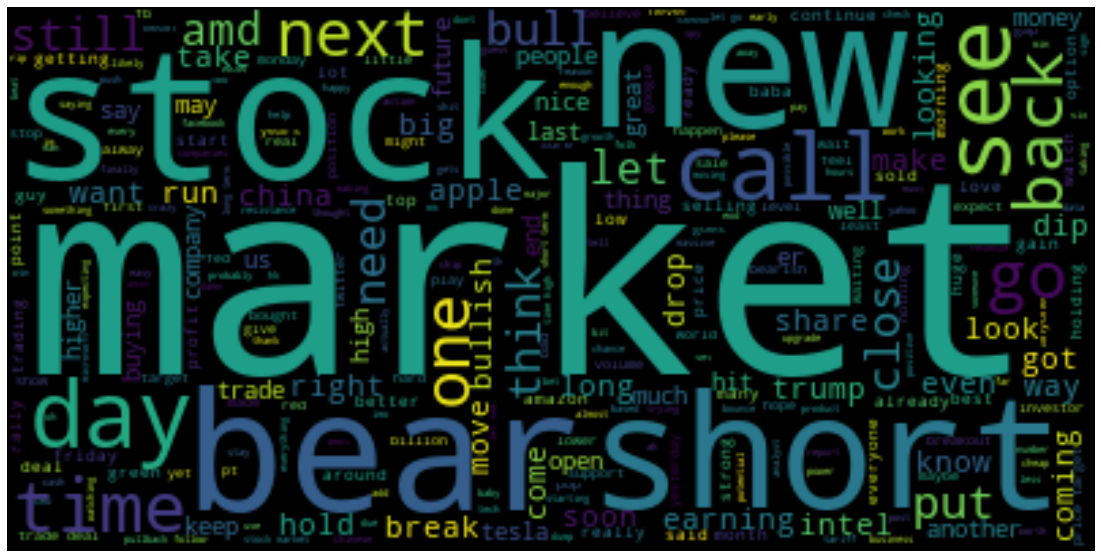

In [13]:
# Join the different processed titles together.
long_string = ','.join(list(stocks.text.values))
# Create a WordCloud object
wordcloud = WordCloud(background_color="black", max_words=5000, contour_width=3, contour_color='steelblue')
# Generate a word cloud

wordcloud.generate(long_string)
# Visualize the word cloud
#wordcloud.to_image()

plt.figure(figsize=(20,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

## Define Function

In [14]:
# Helper function
def plot_10_most_common_words(count_data, count_vectorizer, name):
    import matplotlib.pyplot as plt
    words = count_vectorizer.get_feature_names()
    total_counts = np.zeros(len(words))
    for t in count_data:
        total_counts+=t.toarray()[0]
    
    count_dict = (zip(words, total_counts))
    count_dict = sorted(count_dict, key=lambda x:x[1], reverse=True)[0:10]
    words = [w[0] for w in count_dict]
    counts = [w[1] for w in count_dict]
    x_pos = np.arange(len(words)) 
    
    fig = plt.figure(2, figsize=(15, 15/1.6180))
    plt.subplot(title='10 most common words')
    sns.set_context("notebook", font_scale=1.25, rc={"lines.linewidth": 2.5})
    sns.barplot(x_pos, counts, palette='husl')
    plt.xticks(x_pos, words, rotation=90,fontsize=16) 
    plt.xlabel('words',fontsize=18)
    plt.ylabel('counts',fontsize=18)
    plt.show()
    fig.savefig('Stocktwits_' + name + '.png')


# Helper function
def print_topics(model, count_vectorizer, n_top_words):
    words = count_vectorizer.get_feature_names()
    for topic_idx, topic in enumerate(model.components_):
        print("\nTopic #%d:" % topic_idx)
        print(" ".join([words[i] for i in topic.argsort()[:-n_top_words - 1:-1]]))

# Return the top 10 Topic 3 function
def Get_one_topic(model, count_vectorizer, n_top_words, topic_no):
    words = count_vectorizer.get_feature_names()
    topic2 =[]
    for topic_idx, topic in enumerate(model.components_):
        if topic_idx == topic_no:
            for i in topic.argsort()[:-n_top_words - 1:-1]:
                topic2.append(words[i])

    return topic2

# Return the top all Topics function
def Get_topic(model, count_vectorizer, n_top_words):
    words      = count_vectorizer.get_feature_names()
    all_topics = [ [0] * (len(words)) for _ in range(number_topics)]
    for topic_idx, topic in enumerate(model.components_): 
        fav_topic = []
        for i in topic.argsort()[:-n_top_words - 1:-1]:
            fav_topic.append(words[i])
            #all_topics[topic_idx][i] = words[i]
        all_topics[topic_idx] = fav_topic

    return all_topics

def Display_Topics(topics):
    cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]  # more colors: 'mcolors.XKCD_COLORS'

    cloud = WordCloud(stopwords=mystopwords,
                      background_color='white',
                      width=2500,
                      height=1800,
                      max_words=20,
                      colormap='tab10',
                      color_func=lambda *args, **kwargs: cols[i],
                      prefer_horizontal=1.0)

    #topics = lda_tri.show_topics(formatted=False)

    fig, axes = plt.subplots(1, number_topics, figsize=(25,25), sharex=True, sharey=True)

    for i, ax in enumerate(axes.flatten()):
        fig.add_subplot(ax)
        topic_words = ','.join(list(topics[i])) 
        cloud.generate(topic_words)
        plt.gca().imshow(cloud)
        plt.gca().set_title('Topic ' + str(i+1), fontdict=dict(size=40))
        plt.gca().axis('off')


    plt.subplots_adjust(wspace=0, hspace=0)
    plt.axis('off')
    plt.margins(x=0, y=0)
    plt.tight_layout()
    plt.show()
    
def WordCloud_Display(count_vectorizer,count_data,name):
    count_vectorizer.vocabulary_
    sum_words = count_data.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in count_vectorizer.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    
    #Generating wordcloud and saving as jpg image
    words_dict = dict(words_freq)
    WC_height = 1000
    WC_width = 1500
    WC_max_words = 200
    wordCloud = WordCloud(max_words=WC_max_words, height=WC_height, width=WC_width,stopwords=mystopwords)
    wordCloud.generate_from_frequencies(words_dict)

    plt.figure(figsize=(20,10))
    plt.title('Most frequently occurring ' + name + ' connected by same colour and font size')
    plt.imshow(wordCloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()
    wordCloud.to_file('WordCloud_' + name + '.jpg')
    

## 4. Count Vectorizer WordCloud for Unigram, Bigram and Trigram

### Unigram bigram and trigram

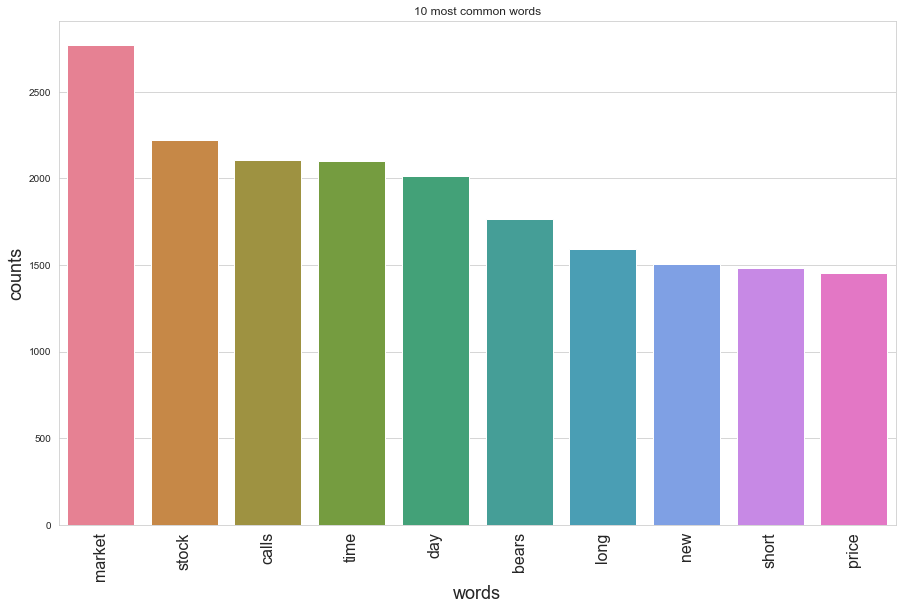

In [15]:
# Initialise the count vectorizer with the English stop words
count_vectorizer_Allgram = CountVectorizer(stop_words='english', ngram_range=(1,3))
# Fit and transform the processed titles
count_data_all = count_vectorizer_Allgram.fit_transform(stocks.text)
# Visualise the 10 most common words
plot_10_most_common_words(count_data_all, count_vectorizer_Allgram, 'Stocktwits_uni_bi_trigram_word_count_BarChart_ALL_3')

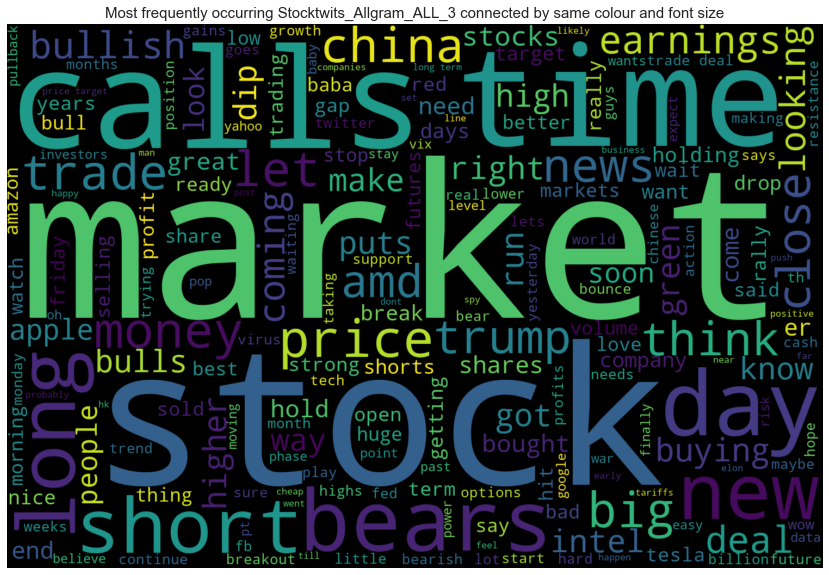

In [16]:
WordCloud_Display(count_vectorizer_Allgram,count_data_all,"Stocktwits_Allgram_ALL_3")

### unigram

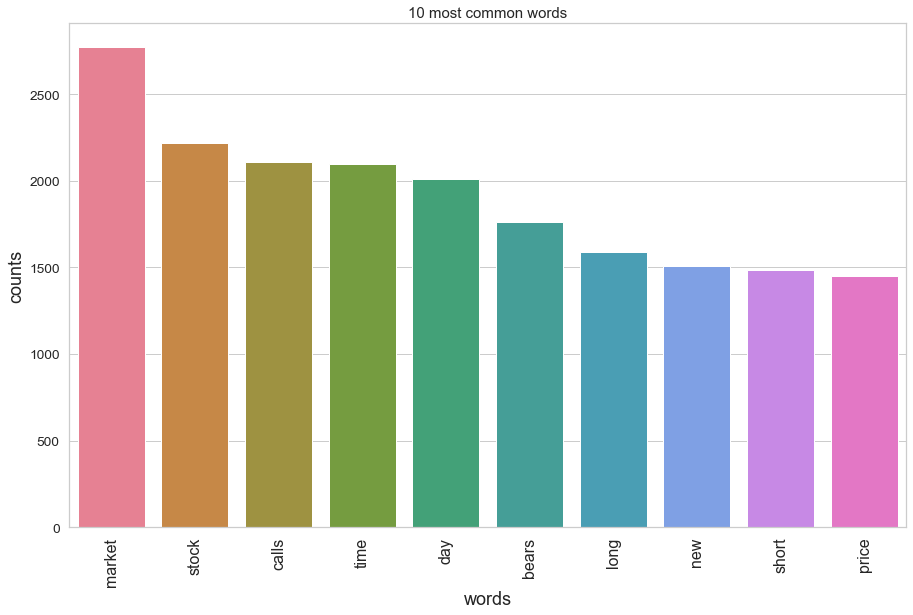

In [17]:
# Initialise the count vectorizer with the English stop words
count_vectorizer_Unigram = CountVectorizer(stop_words='english', ngram_range=(1,1))
# Fit and transform the processed titles
count_data_uni = count_vectorizer_Unigram.fit_transform(stocks.text)
# Visualise the 10 most common words
plot_10_most_common_words(count_data_uni, count_vectorizer_Unigram, 'Stocktwits_unigram_word_count_BarChart_ALL_3')

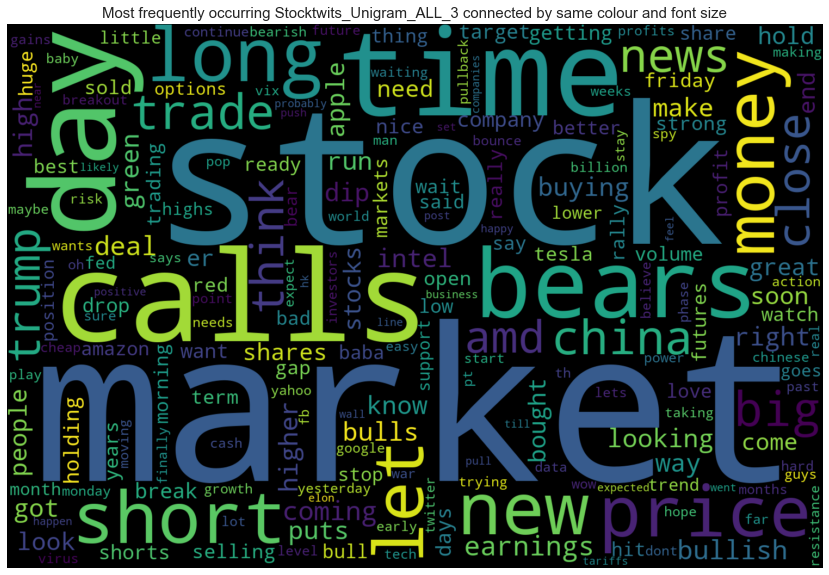

In [18]:
WordCloud_Display(count_vectorizer_Unigram,count_data_uni,"Stocktwits_Unigram_ALL_3")

### Bigram

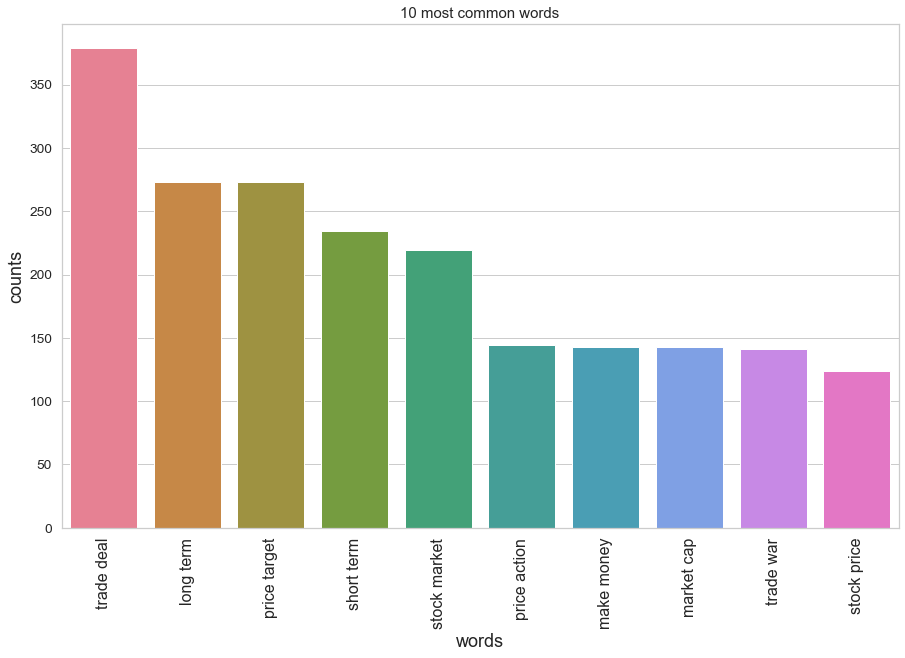

In [19]:
# Initialise the count vectorizer with the English stop words
count_vectorizer_Bigram = CountVectorizer(stop_words='english', ngram_range=(2,2))
# Fit and transform the processed titles
count_data_bi = count_vectorizer_Bigram.fit_transform(stocks.text)
# Visualise the 10 most common words
plot_10_most_common_words(count_data_bi, count_vectorizer_Bigram, 'Stocktwits_Bigram_word_count_BarChart_ALL_3')

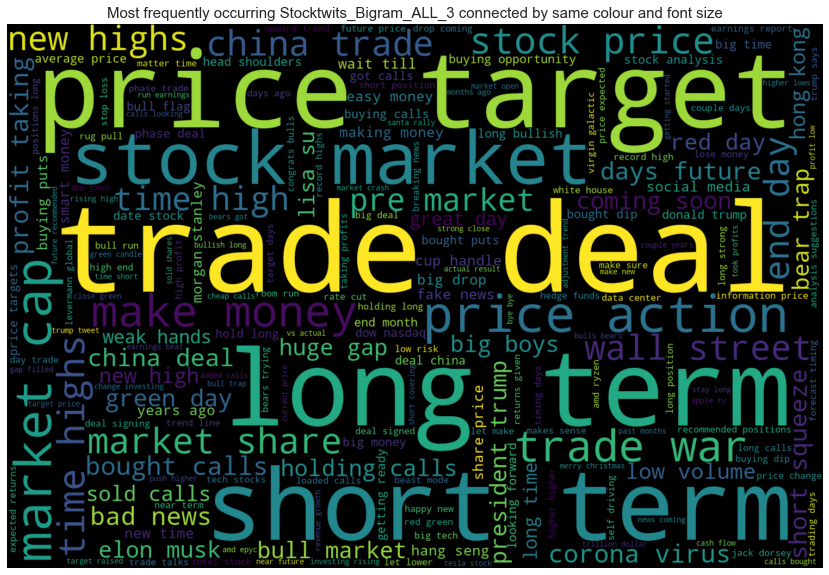

In [20]:
WordCloud_Display(count_vectorizer_Bigram,count_data_bi,"Stocktwits_Bigram_ALL_3")

### Trigram

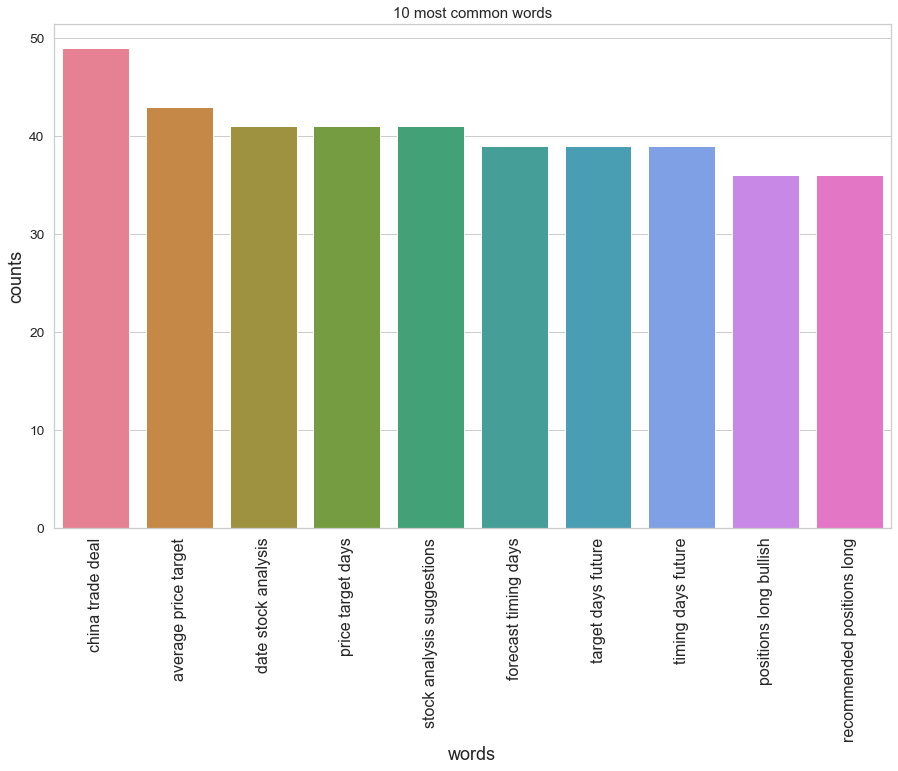

In [21]:
# Initialise the count vectorizer with the English stop words
count_vectorizer_Trigram = CountVectorizer(stop_words='english', ngram_range=(3,3))
# Fit and transform the processed titles
count_data_tri = count_vectorizer_Trigram.fit_transform(stocks.text)
# Visualise the 10 most common words
plot_10_most_common_words(count_data_tri, count_vectorizer_Trigram, 'Stocktwits_Trigram_word_count_BarChart_ALL_3')

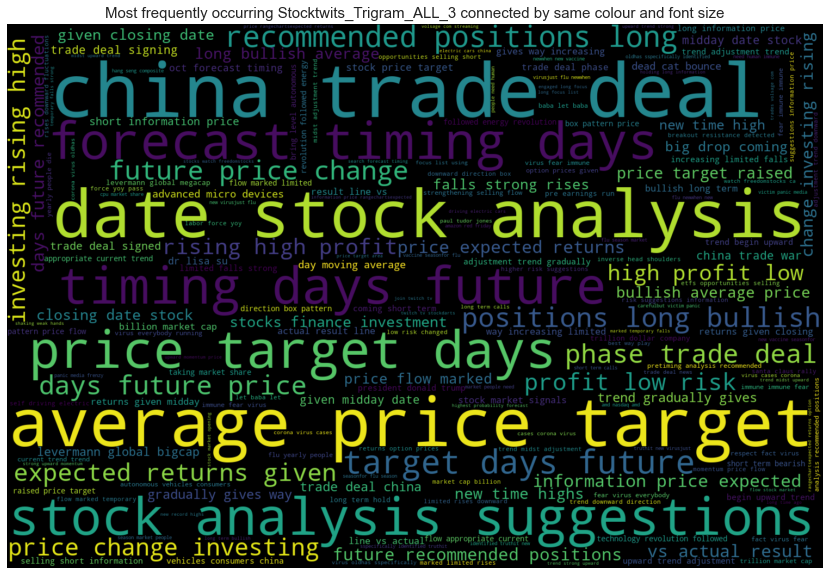

In [22]:
WordCloud_Display(count_vectorizer_Trigram,count_data_tri,"Stocktwits_Trigram_ALL_3")

## 5. Create LDA Model 

### Allgram output

In [23]:
# Create and fit the LDA model
lda_All = LDA(n_components=number_topics, n_jobs=-1)
lda_All.fit(count_data_all)
# Print the topics found by the LDA model
print("Topics found via LDA:")
print_topics(lda_All, count_vectorizer_Allgram, number_words)

Topics found via LDA:

Topic #0:
market new day stock calls long news looking short bears trump time money bullish high price bought china think trade intel stocks getting great make green close strong big run

Topic #1:
market time let bears calls close long money china day stock trade think short bulls deal run news way shares big hold make know need dip bullish holding coming trump

Topic #2:
stock calls price time big amd earnings puts market bears coming deal day short right trade higher got intel trump apple long soon drop buying target green come nice shorts


### Unigram output

In [24]:
# Create and fit the LDA model
lda_uni = LDA(n_components=number_topics, n_jobs=-1)
lda_uni.fit(count_data_uni)
# Print the topics found by the LDA model
print("Topics found via LDA:")
print_topics(lda_uni, count_vectorizer_Unigram, number_words)

Topics found via LDA:

Topic #0:
calls let close day long bullish green short puts dip hold bought higher holding earnings looking nice open red bulls gap time got shares getting friday sold morning price stock

Topic #1:
bears time market big deal trade coming money news run trump china day shorts come break great stock make er right bear long bull short buying virus soon earnings need

Topic #2:
market stock amd intel price new company apple years know share think target china high stocks people growth future trump amazon billion trade twitter tech best way end google make


### Bigram output

In [25]:
# Create and fit the LDA model
lda_bi = LDA(n_components=number_topics, n_jobs=-1)
lda_bi.fit(count_data_bi)
# Print the topics found by the LDA model
print("Topics found via LDA:")
print_topics(lda_bi, count_vectorizer_Bigram, number_words)

Topics found via LDA:

Topic #0:
trade deal long term make money stock market short term market cap big boys trade war stock analysis coming soon china deal huge gap red day date stock china trade information price analysis suggestions market share bought dip price action bad news long time stock price deal signing buying dip new highs expected returns returns given price expected bears trying

Topic #1:
long term short term time highs stock market price action price target end day cup handle trade deal wall street president trump getting ready great day market share new highs bull market time high weak hands bought calls profit taking trade war looking forward vs actual low volume actual result china trade hong kong pre market big drop push higher

Topic #2:
price target trade deal days future stock price stock market bear trap short term market cap trade war make money long term time high bought calls corona virus wall street new highs green day china trade recommended positions long

### Trigram output

In [26]:
# Create and fit the LDA model
lda_tri = LDA(n_components=number_topics, n_jobs=-1)
lda_tri.fit(count_data_tri)
# Print the topics found by the LDA model
print("Topics found via LDA:")
print_topics(lda_tri, count_vectorizer_Trigram, number_words)

Topics found via LDA:

Topic #0:
china trade deal price target days price flow marked timing days future forecast timing days target days future recommended positions long positions long bullish new time high investing rising high rising high profit high profit low profit low risk price change investing days future price future price change future recommended positions days future recommended change investing rising phase trade deal average price target bullish average price long bullish average flow marked limited pattern price flow box pattern price direction box pattern trade deal signed oct forecast timing stock market signals

Topic #1:
price target raised china trade deal stock price target average price target bring level autonomous trade deal phase vehicles consumers china breakout resistance detected twitch tv stockdarts join twitch tv dr lisa su new time highs coming short term advanced micro devices market caphas cash analysts offering month offering month price stockdarts c

## Get Topics

In [27]:
Allgram_topics = Get_topic(lda_All, count_vectorizer_Allgram, number_words)

In [28]:
Unigram_topics = Get_topic(lda_uni, count_vectorizer_Unigram, number_words)

In [29]:
Bigram_topics = Get_topic(lda_bi, count_vectorizer_Bigram, number_words)

In [30]:
Trigram_topics = Get_topic(lda_tri, count_vectorizer_Trigram, number_words)

## WordCloud in terms of Topics

### AllGgram

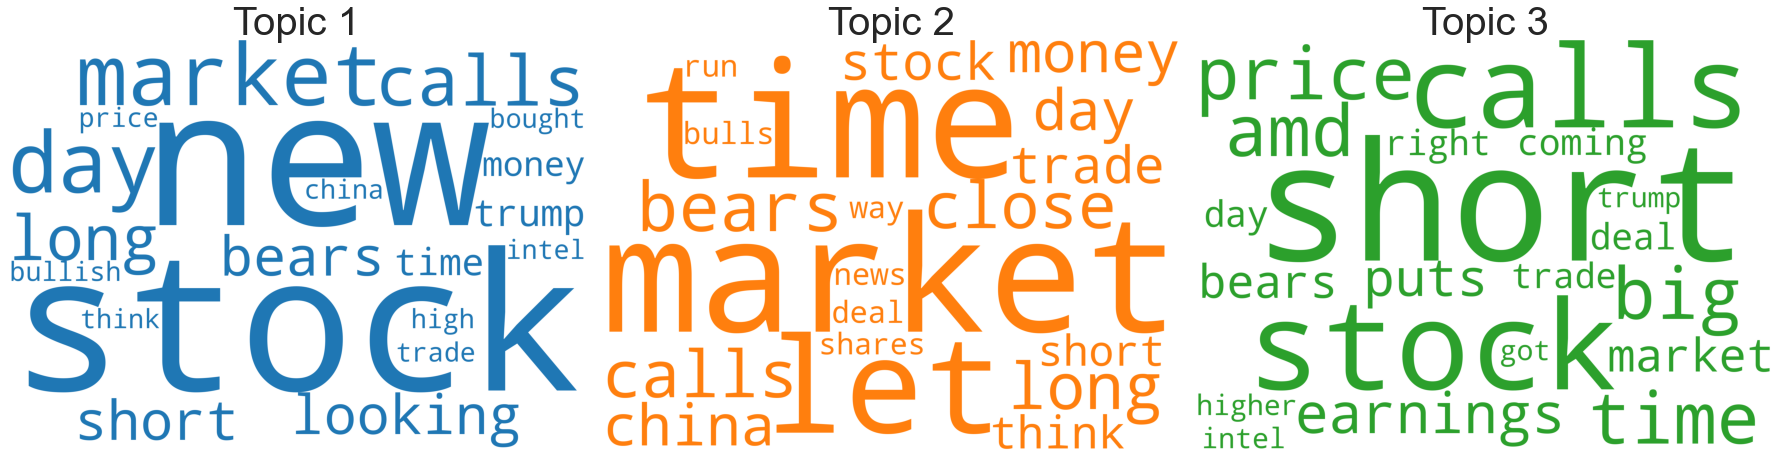

In [31]:
Display_Topics(Allgram_topics)

### Unigram

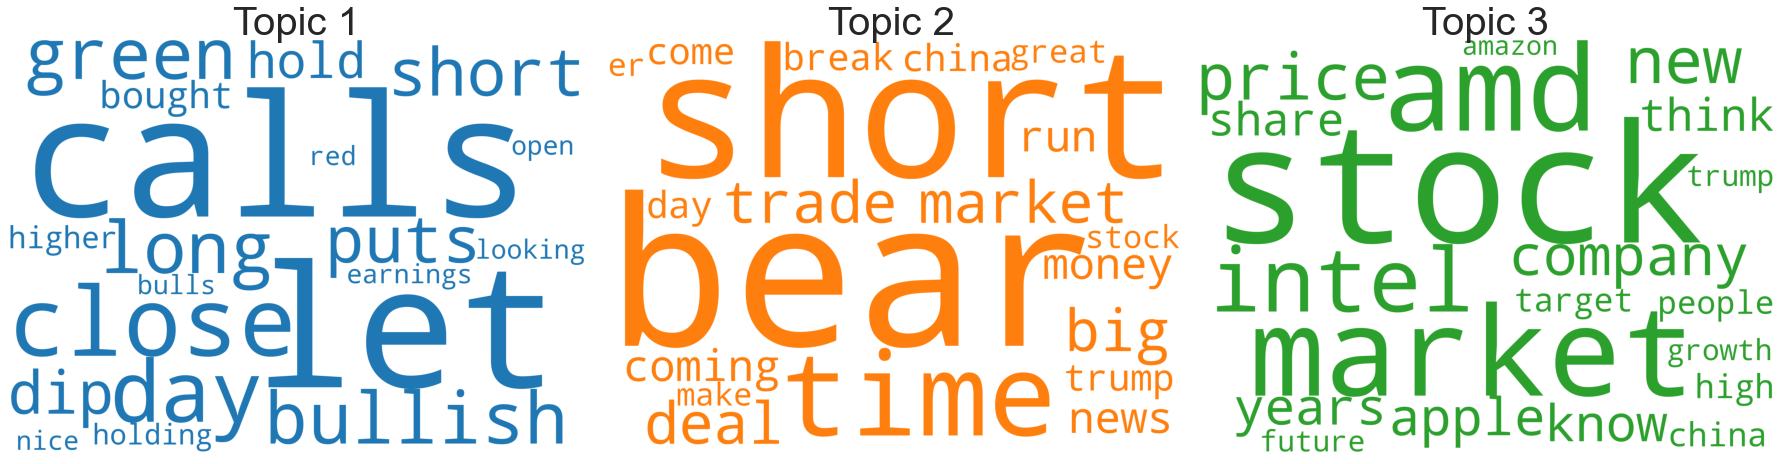

In [32]:
Display_Topics(Unigram_topics)

### Bigram

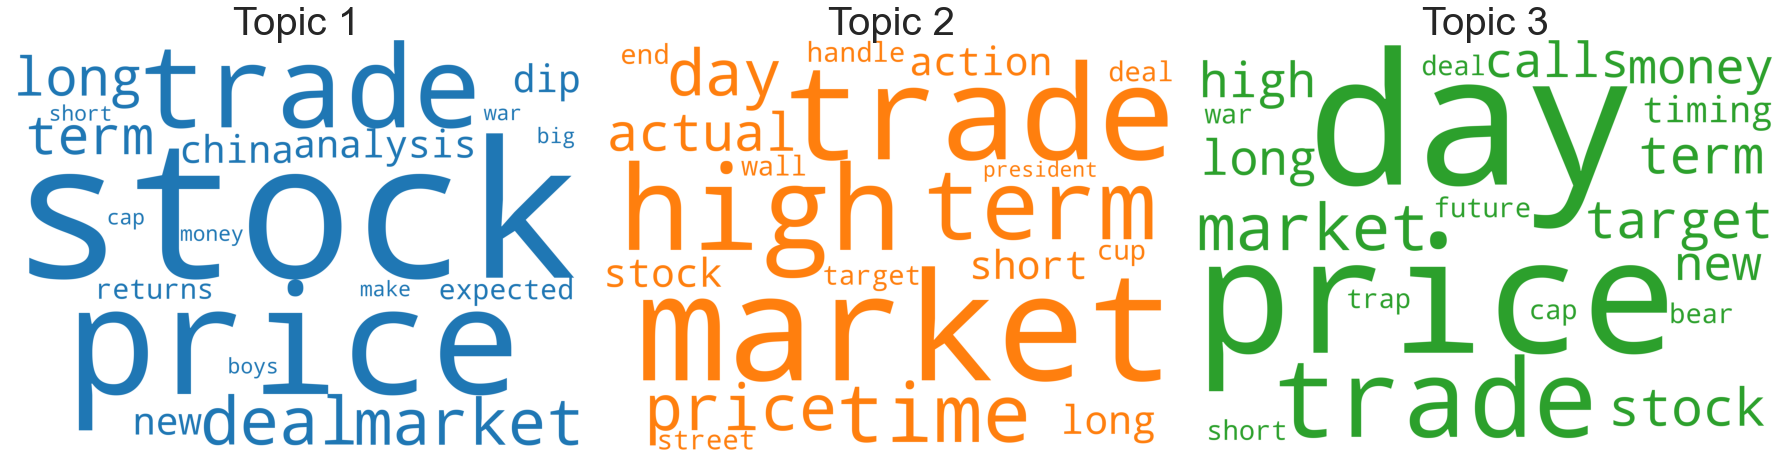

In [33]:
Display_Topics(Bigram_topics)

### Trigram

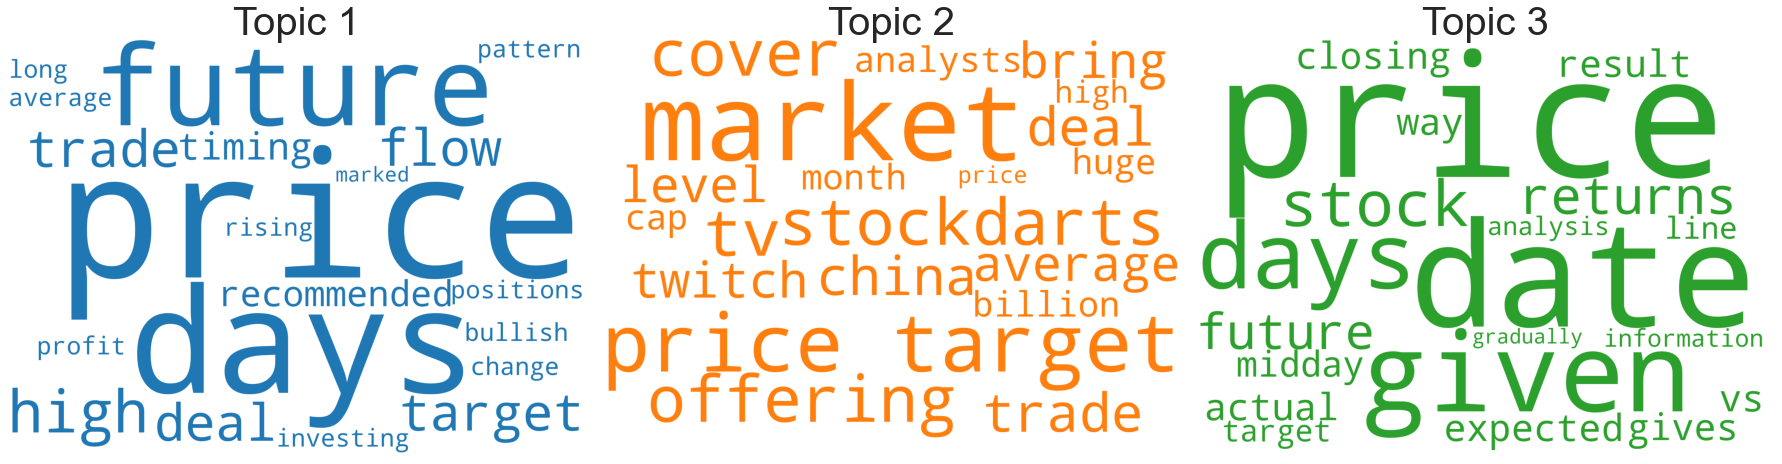

In [34]:
Display_Topics(Trigram_topics)

## 6. pyLDAvis Display

In [35]:
import os
os.path

<module 'ntpath' from 'C:\\Users\\Wilson\\.conda\\envs\\chatbot\\lib\\ntpath.py'>

In [36]:
from pyLDAvis import sklearn as sklearn_lda
import pickle 
import pyLDAvis
LDAvis_data_filepath_all  = os.path.join('./ldavis_Stocktwits_all_news_ALL_'+str(number_topics))
LDAvis_data_filepath_uni  = os.path.join('./ldavis_Stocktwits_uni_news_ALL_'+str(number_topics))
LDAvis_data_filepath_bi   = os.path.join('./ldavis_Stocktwits_bi_news_ALL_'+str(number_topics))
LDAvis_data_filepath_tri  = os.path.join('./ldavis_Stocktwits_tri_news_ALL_'+str(number_topics))

In [37]:
# this is a bit time consuming - make the if statement True
LDAvis_prepared_all = sklearn_lda.prepare(lda_All,count_data_all,count_vectorizer_Allgram)
LDAvis_prepared_uni = sklearn_lda.prepare(lda_uni,count_data_uni, count_vectorizer_Unigram) 
LDAvis_prepared_bi  = sklearn_lda.prepare(lda_bi,count_data_bi, count_vectorizer_Bigram)
LDAvis_prepared_tri = sklearn_lda.prepare(lda_tri,count_data_tri, count_vectorizer_Trigram) 

C:\Users\Wilson\.conda\envs\chatbot\lib\site-packages\pyLDAvis\_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat([default_term_info] + list(topic_dfs))
C:\Users\Wilson\.conda\envs\chatbot\lib\site-packages\pyLDAvis\_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat([default_term_info] + list(topic_dfs))
C:\Users\Wilson\.conda\envs\chatbot\lib\site-packages\pyLDAvis\_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by 

## 7. Save LDAvis and output of Topics

In [38]:
pyLDAvis.enable_notebook()

In [39]:
LDAvis_prepared_all

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
1      0.052247  0.063100       1        1  34.809096
2     -0.082324  0.012447       2        1  33.192409
0      0.030076 -0.075547       3        1  31.998496, topic_info=       Category         Freq          Term        Total  loglift  logprob
283632  Default   963.000000           new   963.000000  30.0000  30.0000
232068  Default   878.000000           let   878.000000  29.0000  29.0000
255987  Default  1777.000000        market  1777.000000  28.0000  28.0000
336142  Default   577.000000          puts   577.000000  27.0000  27.0000
12012   Default   736.000000           amd   736.000000  26.0000  26.0000
325230  Default   930.000000         price   930.000000  25.0000  25.0000
77927   Default   782.000000         close   782.000000  24.0000  24.0000
326337  Default   175.000000  price target   175.000000  23.0000  23.0000
243935  Default   626.000000       looking   626.000000  22.0000  22.0000
126973  Default   732.000000      earnings   732.000000  21.0000  21.0000
106934  Default   706.000000          deal   706.000000  20.0000  20.0000
105819  Default    51.000000   days future    51.000000  19.0000  19.0000
55587   Default   584.000000         bulls   584.000000  18.0000  18.0000
103324  Default  1288.000000           day  1288.000000  17.0000  17.0000
357674  Default   595.000000         right   595.000000  16.0000  16.0000
38555   Default   855.000000           big   855.000000  15.0000  15.0000
420569  Default   435.000000        target   435.000000  14.0000  14.0000
46367   Default   522.000000        bought   522.000000  13.0000  13.0000
72727   Default   839.000000         china   839.000000  12.0000  12.0000
435418  Default  1350.000000          time  1350.000000  11.0000  11.0000
414369  Default    42.000000   suggestions    42.000000  10.0000  10.0000
123277  Default   438.000000          drop   438.000000   9.0000   9.0000
212823  Default   605.000000         intel   605.000000   8.0000   8.0000
404875  Default  1423.000000         stock  1423.000000   7.0000   7.0000
175278  Default   593.000000           got   593.000000   6.0000   6.0000
83268   Default   700.000000        coming   700.000000   5.0000   5.0000
131240  Default   160.000000          elon   160.000000   4.0000   4.0000
166932  Default   393.000000           gap   393.000000   3.0000   3.0000
155858  Default   101.000000          flow   101.000000   2.0000   2.0000
160795  Default   401.000000        friday   401.000000   1.0000   1.0000
...         ...          ...           ...          ...      ...      ...
415909   Topic3   106.722090          sure   217.161008   0.4291  -7.8762
404875   Topic3   469.722514         stock  1423.540301   0.0307  -6.3943
407480   Topic3   213.062944        stocks   525.083388   0.2375  -7.1849
240573   Topic3   353.208182          long  1022.840744   0.0762  -6.6794
54352    Topic3   262.771114       bullish   707.184172   0.1495  -6.9752
53742    Topic3   144.937231          bull   325.378161   0.3308  -7.5702
448133   Topic3   275.211597         trump   765.222361   0.1169  -6.9289
177581   Topic3   206.276977         great   522.229247   0.2106  -7.2172
382003   Topic3   312.036784         short   953.351174   0.0226  -6.8033
275537   Topic3   140.009939       morning   319.810585   0.3135  -7.6048
193954   Topic3   121.128553         highs   265.286510   0.3555  -7.7496
259466   Topic3   145.211491       markets   343.100545   0.2796  -7.5683
212823   Topic3   216.146426         intel   605.961126   0.1086  -7.1705
60992    Topic3   371.304319         calls  1354.668736  -0.1548  -6.6294
426308   Topic3   161.158371         tesla   402.615280   0.2239  -7.4641
430742   Topic3   247.152901         think   772.462718  -0.0001  -7.0365
271876   Topic3   268.746218         money   885.361875  -0.0527  -6.9527
31397    Topic3   310.133854         bears  1133.905509  -0.1

In [40]:
LDAvis_prepared_uni

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
2      0.145842 -0.087101       1        1  36.837802
0     -0.165184 -0.059711       2        1  31.765437
1      0.019342  0.146812       3        1  31.396761, topic_info=      Category         Freq       Term        Total  loglift  logprob
4405   Default  1890.000000      calls  1890.000000  30.0000  30.0000
2568   Default  1586.000000      bears  1586.000000  29.0000  29.0000
5518   Default  1088.000000      close  1088.000000  28.0000  28.0000
1058   Default  1063.000000        amd  1063.000000  27.0000  27.0000
16739  Default  1222.000000        let  1222.000000  26.0000  26.0000
7449   Default   988.000000       deal   988.000000  25.0000  25.0000
15208  Default   875.000000      intel   875.000000  24.0000  24.0000
12826  Default   810.000000      green   810.000000  23.0000  23.0000
5809   Default   982.000000     coming   982.000000  22.0000  22.0000
2951   Default  1204.000000        big  1204.000000  21.0000  21.0000
25277  Default   839.000000        run   839.000000  20.0000  20.0000
14014  Default   728.000000       hold   728.000000  19.0000  19.0000
3532   Default   733.000000     bought   733.000000  18.0000  18.0000
30050  Default  1888.000000       time  1888.000000  17.0000  17.0000
14029  Default   669.000000    holding   669.000000  16.0000  16.0000
19618  Default  1119.000000       news  1119.000000  15.0000  15.0000
30596  Default  1229.000000      trade  1229.000000  14.0000  14.0000
23401  Default   807.000000       puts   807.000000  13.0000  13.0000
4001   Default   993.000000    bullish   993.000000  12.0000  12.0000
8133   Default   827.000000        dip   827.000000  11.0000  11.0000
20679  Default   568.000000       open   568.000000  10.0000  10.0000
24087  Default   568.000000        red   568.000000   9.0000   9.0000
30941  Default  1083.000000      trump  1083.000000   8.0000   8.0000
17829  Default  2527.000000     market  2527.000000   7.0000   7.0000
12056  Default   550.000000        gap   550.000000   6.0000   6.0000
7282   Default  1808.000000        day  1808.000000   5.0000   5.0000
5921   Default   714.000000    company   714.000000   4.0000   4.0000
19713  Default   632.000000       nice   632.000000   3.0000   3.0000
5161   Default  1185.000000      china  1185.000000   2.0000   2.0000
26255  Default   506.000000      share   506.000000   1.0000   1.0000
...        ...          ...        ...          ...      ...      ...
18531   Topic3   108.093034    minutes   112.512716   1.1184  -6.8868
2664    Topic3   117.007307  beautiful   122.485042   1.1127  -6.8076
2951    Topic3  1004.674715        big  1204.215002   0.9773  -4.6574
3701    Topic3   174.881296   breaking   188.348685   1.0843  -6.4057
32464   Topic3   244.490918      wants   271.507658   1.0537  -6.0706
26537   Topic3   531.165628     shorts   631.324949   0.9857  -5.2947
19618   Topic3   865.026781       news  1119.429170   0.9007  -4.8070
30596   Topic3   928.613687      trade  1229.810326   0.8775  -4.7361
18799   Topic3   889.626274      money  1242.632018   0.8243  -4.7790
30050   Topic3  1270.411991       time  1888.832344   0.7618  -4.4227
30941   Topic3   756.488394      trump  1083.001610   0.7997  -4.9411
5779    Topic3   525.661178       come   715.732826   0.8498  -5.3051
23264   Topic3   194.104603       pull   224.825308   1.0115  -6.3014
3688    Topic3   482.510286      break   691.424463   0.7987  -5.3908
5161    Topic3   744.758345      china  1185.849062   0.6933  -4.9567
3980    Topic3   344.095224       bull   457.960747   0.8726  -5.7289
33490   Topic3   245.906128        wow   311.788244   0.9211  -6.0649
12783   Topic3   466.377785      great   736.798047   0.7011  -5.4248
17829   Topic3  1152.094771     market  2527.202699   0.3729  -4.5205
7282    Topic3   739.454090        day  1808.767948   0.2640  -4.9639
17648   Topic3   449.480379       make   854.43

In [41]:
LDAvis_prepared_bi

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
2     -0.095611 -0.028047       1        1  34.402883
0      0.072711 -0.066728       2        1  33.351155
1      0.022900  0.094775       3        1  32.245961, topic_info=       Category        Freq                   Term       Total  loglift  \
47213   Default   46.000000            days future   46.000000  30.0000   
146101  Default  157.000000           price target  157.000000  29.0000   
13849   Default   39.000000              bear trap   39.000000  28.0000   
181854  Default   27.000000         stock analysis   27.000000  27.0000   
198170  Default  217.000000             trade deal  217.000000  26.0000   
46089   Default   24.000000             date stock   24.000000  25.0000   
155568  Default   24.000000  recommended positions   24.000000  24.0000   
94754   Default   23.000000      information price   23.000000  23.0000   
6589    Default   23.000000   analysis suggestions   23.000000  22.0000   
188801  Default   24.000000            target days   24.000000  21.0000   
71257   Default   23.000000        forecast timing   23.000000  20.0000   
196446  Default   23.000000            timing days   23.000000  19.0000   
145739  Default   23.000000           price change   23.000000  18.0000   
142882  Default   21.000000         positions long   21.000000  17.0000   
195695  Default   70.000000             time highs   70.000000  16.0000   
108296  Default   26.000000           long bullish   26.000000  15.0000   
44591   Default   31.000000             cup handle   31.000000  14.0000   
111699  Default   19.000000               low risk   19.000000  13.0000   
155995  Default   19.000000              red green   19.000000  12.0000   
73835   Default   21.000000           future price   21.000000  11.0000   
76492   Default   25.000000          getting ready   25.000000  10.0000   
17317   Default   40.000000               big boys   40.000000   9.0000   
159373  Default   17.000000          returns given   17.000000   8.0000   
63488   Default   17.000000       expected returns   17.000000   7.0000   
145818  Default   17.000000         price expected   17.000000   6.0000   
107864  Default   18.000000           loaded calls   18.000000   5.0000   
31252   Default   17.000000       change investing   17.000000   4.0000   
86470   Default   17.000000            high profit   17.000000   3.0000   
147831  Default   17.000000             profit low   17.000000   2.0000   
1704    Default   15.000000          actual result   15.000000   1.0000   
...         ...         ...                    ...         ...      ...   
79903    Topic3   21.086432              great day   33.479184   0.6695   
59192    Topic3   33.005281                end day   61.901564   0.5029   
171985   Topic3   57.758001             short term  133.735125   0.2922   
72058    Topic3    9.567630       freedomstocks ca   11.859011   0.9171   
145264   Topic3   22.752672        president trump   39.738459   0.5741   
108661   Topic3   59.524698              long term  155.867351   0.1692   
86782    Topic3   13.280392          higher higher   19.225168   0.7618   
109746   Topic3   15.511535        looking forward   24.377324   0.6797   
182294   Topic3   45.341886           stock market  125.378071   0.1147   
5625     Topic3   11.912662               amd epyc   16.975043   0.7776   
54065    Topic3   11.122472              dow jones   15.289187   0.8136   
155616   Topic3   13.316956           record highs   21.001066   0.6762   
209842   Topic3   24.488981            wall street   62.158306   0.2003   
146101   Topic3   40.639202           price target  157.003304  -0.2198   
212310   Topic3   16.850411             weak hands   32.954441   0.4610   
190053   Topic3   12.480595            tech stocks   19.289587   0.6964   
24178    Topic3   18.440655            bull market   40.903407   0.3351   
84392    Top

In [42]:
LDAvis_prepared_tri

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
2     -0.086122  0.043333       1        1  33.939583
0      0.005212 -0.095619       2        1  33.088736
1      0.080909  0.052285       3        1  32.971681, topic_info=       Category       Freq                              Term      Total  \
49717   Default  21.000000               date stock analysis  21.000000   
194937  Default  21.000000        stock analysis suggestions  21.000000   
68338   Default  16.000000            expected returns given  16.000000   
225029  Default  14.000000                  vs actual result  14.000000   
157071  Default  14.000000            price expected returns  14.000000   
100951  Default  14.000000        information price expected  14.000000   
157088  Default  11.000000                 price flow marked  11.000000   
38684   Default  11.000000                closing date stock  11.000000   
81920   Default  11.000000                given closing date  11.000000   
215601  Default  10.000000             trend gradually gives  10.000000   
84844   Default  10.000000               gradually gives way  10.000000   
81958   Default  10.000000                 given midday date  10.000000   
128625  Default  10.000000                 midday date stock  10.000000   
184274  Default   9.000000           short information price   9.000000   
51691   Default   9.000000                   dead cat bounce   9.000000   
196003  Default   8.000000                stock price target   8.000000   
157467  Default  21.000000                 price target days  21.000000   
137880  Default  11.000000                     new time high  11.000000   
211649  Default  20.000000                timing days future  20.000000   
76103   Default  20.000000              forecast timing days  20.000000   
202760  Default  20.000000                target days future  20.000000   
113332  Default   8.000000                    line vs actual   8.000000   
1644    Default   8.000000                actual result line   8.000000   
170871  Default   8.000000                    result line vs   8.000000   
171417  Default   8.000000              returns given midday   8.000000   
171416  Default   8.000000             returns given closing   8.000000   
82041   Default   8.000000              gives way increasing   8.000000   
228532  Default   8.000000            way increasing limited   8.000000   
167447  Default  19.000000        recommended positions long  19.000000   
153791  Default  19.000000            positions long bullish  19.000000   
...         ...        ...                               ...        ...   
126232   Topic3   3.235238                     math ac mdebt   3.578542   
519      Topic3   3.235238                   ac mdebt divide   3.578542   
109022   Topic3   3.235238          land delineated whopping   3.578542   
57987    Topic3   3.235238                      door sold ac   3.578542   
162942   Topic3   3.235238        quality drilling locations   3.578542   
113087   Topic3   3.235238             lilis heavily shorted   3.578542   
1190     Topic3   3.235238                    acres blm land   3.578542   
53951    Topic3   3.235238          delineated whopping high   3.578542   
230670   Topic3   3.235238             whopping high quality   3.578542   
21988    Topic3   3.235238  borders wpxmatadorfangconcho oxy   3.578542   
59124    Topic3   3.235238             drilling locations vs   3.578542   
92092    Topic3   3.235238             high quality drilling   3.578542   
187214   Topic3   3.235238                    simple math ac   3.578542   
523      Topic3   3.235238                      ac tier land   3.578542   
22746    Topic3   3.235238             boughtthe simple math   3.578542   
157519   Topic3  10.026412               price target raised  13.305749   
223296   Topic3   5.274921          vehicles consumers china   7.175047   
213461   Top

### Save LDA Allgram Model

In [43]:
with open(LDAvis_data_filepath_all, 'wb') as f1:
    pickle.dump(LDAvis_prepared_all, f1)

In [44]:
with open(LDAvis_data_filepath_all,'rb') as f1:
    LDAvis_prepared_all = pickle.loads(f1.read())

In [45]:
pyLDAvis.save_html(LDAvis_prepared_all, './ldavis_Stocktwits_all_news_ALL_'+ str(number_topics) +'.html')

In [46]:
print(LDAvis_data_filepath_all)

./ldavis_Stocktwits_all_news_ALL_3


### Save LDA Unigram Model

In [47]:
with open(LDAvis_data_filepath_uni, 'wb') as f2:
    pickle.dump(LDAvis_prepared_uni, f2)

In [48]:
with open(LDAvis_data_filepath_uni,'rb') as f2:
    LDAvis_prepared_uni = pickle.loads(f2.read())

In [49]:
pyLDAvis.save_html(LDAvis_prepared_uni, './ldavis_prepared_uni_news_ALL_'+ str(number_topics) +'.html')

In [50]:
print(LDAvis_data_filepath_uni)

./ldavis_Stocktwits_uni_news_ALL_3


### Save LDA Bigram Model

In [51]:
with open(LDAvis_data_filepath_bi, 'wb') as f3:
    pickle.dump(LDAvis_prepared_bi, f3)

In [52]:
with open(LDAvis_data_filepath_bi,'rb') as f3:
    LDAvis_prepared_bi = pickle.loads(f3.read())

In [53]:
pyLDAvis.save_html(LDAvis_prepared_bi, './ldavis_Stocktwits_bi_news_ALL_'+ str(number_topics) +'.html')

In [54]:
print(LDAvis_data_filepath_bi)

./ldavis_Stocktwits_bi_news_ALL_3


### Save LDA Trigram Model

In [55]:
with open(LDAvis_data_filepath_tri, 'wb') as f4:
    pickle.dump(LDAvis_prepared_tri, f4)

In [56]:
with open(LDAvis_data_filepath_tri,'rb') as f4:
    LDAvis_prepared_bi = pickle.loads(f4.read())

In [57]:
pyLDAvis.save_html(LDAvis_prepared_tri, './ldavis_Stocktwits_tri_news_ALL_'+ str(number_topics) +'.html')

In [58]:
print(LDAvis_data_filepath_tri)

./ldavis_Stocktwits_tri_news_ALL_3


### Print the Topic 3 related to investment questions

### Saving for Allgram topics 

In [59]:
allgram_topic0 = Get_one_topic(lda_All, count_vectorizer_Allgram, number_words,0)
allgram_topic1 = Get_one_topic(lda_All, count_vectorizer_Allgram, number_words,1)
allgram_topic2 = Get_one_topic(lda_All, count_vectorizer_Allgram, number_words,2)

In [60]:
with open("Stocktwits/All_topic0.txt", 'w') as f:
    for s in allgram_topic0:
        f.write(s + '\n')

In [61]:
with open("Stocktwits/All_topic1.txt", 'w') as f:
    for s in allgram_topic1:
        f.write(s + '\n')

In [62]:
with open("Stocktwits/All_topic2.txt", 'w') as f:
    for s in allgram_topic2:
        f.write(s + '\n')

### Saving for Unigram topics 

In [63]:
unigram_topic0 = Get_one_topic(lda_uni, count_vectorizer_Unigram, number_words,0)
unigram_topic1 = Get_one_topic(lda_uni, count_vectorizer_Unigram, number_words,1)
unigram_topic2 = Get_one_topic(lda_uni, count_vectorizer_Unigram, number_words,2)

In [64]:
with open("Stocktwits/Uni_topic0.txt", 'w') as f:
    for s in unigram_topic0:
        f.write(s + '\n')

In [65]:
with open("Stocktwits/Uni_topic1.txt", 'w') as f:
    for s in unigram_topic1:
        f.write(s + '\n')

In [66]:
with open("Stocktwits/Uni_topic2.txt", 'w') as f:
    for s in unigram_topic2:
        f.write(s + '\n')

### Saving for Bigram topics 

In [67]:
bigram_topic0 = Get_one_topic(lda_bi, count_vectorizer_Bigram, number_words,0)
bigram_topic1 = Get_one_topic(lda_bi, count_vectorizer_Bigram, number_words,1)
bigram_topic2 = Get_one_topic(lda_bi, count_vectorizer_Bigram, number_words,2)

In [68]:
with open("Stocktwits/Bi_topic0.txt", 'w') as f:
    for s in bigram_topic0:
        f.write(s + '\n')

In [69]:
with open("Stocktwits/Bi_topic1.txt", 'w') as f:
    for s in bigram_topic1:
        f.write(s + '\n')

In [70]:
with open("Stocktwits/Bi_topic2.txt", 'w') as f:
    for s in bigram_topic2:
        f.write(s + '\n')

### Saving for Trigram topics 

In [71]:
tri_topic0 = Get_one_topic(lda_tri, count_vectorizer_Trigram, number_words,0)
tri_topic1 = Get_one_topic(lda_tri, count_vectorizer_Trigram, number_words,1)
tri_topic2 = Get_one_topic(lda_tri, count_vectorizer_Trigram, number_words,2)

In [72]:
with open("Stocktwits/tri_topic0.txt", 'w') as f:
    for s in tri_topic0:
        f.write(s + '\n')

In [73]:
with open("Stocktwits/tri_topic1.txt", 'w') as f:
    for s in tri_topic1:
        f.write(s + '\n')

In [74]:
with open("Stocktwits/tri_topic2.txt", 'w') as f:
    for s in tri_topic2:
        f.write(s + '\n')